In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 模擬版資料做SVM

In [4]:
x = np.array([[6, 6], [10, 8], [3, 7], [8, 7]])

In [5]:
x

array([[ 6,  6],
       [10,  8],
       [ 3,  7],
       [ 8,  7]])

In [6]:
x[:, 0]

array([ 6, 10,  3,  8])

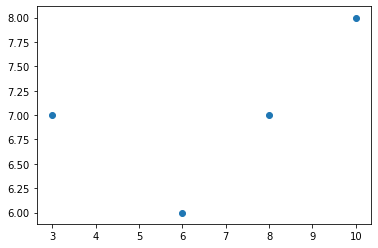

In [8]:
plt.scatter(x[:, 0], x[:, 1]);

In [10]:
y = np.array([1, 2, 1, 2])

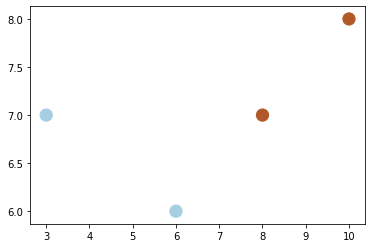

In [14]:
plt.scatter(x[:, 0 ], x[:, 1], c=y, cmap='Paired', s=150); # c是顏色 y=yellow s是大小=>size

### Step 1. 打開函數學習機

In [15]:
from sklearn.svm import SVC

In [19]:
clf = SVC(gamma='auto') # gamma='auto'可以不加

### Step 2. 學習(訓練)

In [20]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### step 3. 預測

In [21]:
y_predict = clf.predict(x)

In [22]:
y_predict

array([1, 2, 1, 2])

In [23]:
y

array([1, 2, 1, 2])

In [26]:
xr = np.random.rand(100)*7 + 3 #範圍3~10
yr = np.random.rand(100)*2 + 6 #範圍6~8

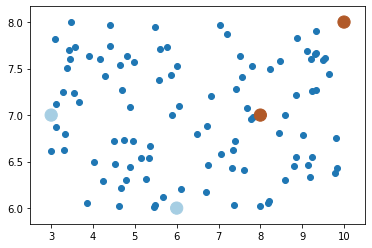

In [28]:
plt.scatter(xr, yr);
plt.scatter(x[:, 0 ], x[:, 1], c=y, cmap='Paired', s=150); # c是顏色 y=yellow s是大小=>size

In [29]:
print('X', xr[:5])
print('Y', yr[:5])

X [8.23127992 3.44910138 7.34921967 3.89461886 9.82950958]
Y [7.49273429 7.60145322 6.62274509 7.63941558 6.42613151]


In [31]:
X = np.c_[xr, yr] #合併xr和yr

In [32]:
Y = clf.predict(X)

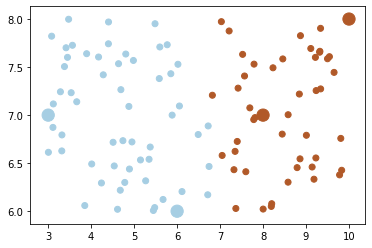

In [39]:
plt.scatter(x[:, 0 ], x[:, 1], c=y, cmap='Paired', s=150); # c是顏色 y=yellow s是大小=>size
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='Paired');

#### 結果呈現

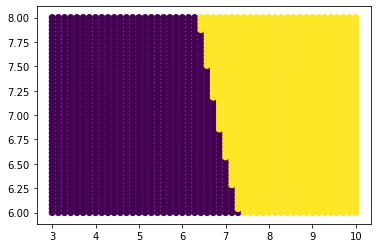

In [47]:
x_list = np.linspace(3, 10, 50)
y_list = np.linspace(6, 8, 50)
X, Y = np.meshgrid(x_list, y_list)
P = np.c_[X.ravel(), Y.ravel()]
C = clf.predict(P)
plt.scatter(P[:,0], P[:,1], c=C);

In [48]:
X.ravel()

array([ 3.        ,  3.14285714,  3.28571429, ...,  9.71428571,
        9.85714286, 10.        ])

### 插播: contour用法

In [49]:
xL = np.array([1,2,3,4])
yL = np.array([5, 6, 7, 8])
X, Y = np.meshgrid(xL, yL)

In [50]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [51]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

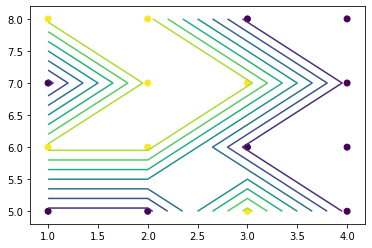

In [61]:
Z = np.random.randint(1, 3, (4,4))
plt.contour(X,Y,Z);
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel());

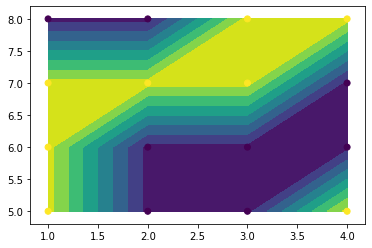

In [63]:
Z = np.random.randint(1, 3, (4,4))
plt.contourf(X,Y,Z); #contourf=>填滿
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel());

### 資料視覺化終極版

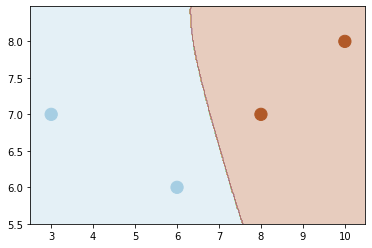

In [76]:
x_array = np.arange(2.5, 10.5, 0.02)
y_array = np.arange(5.5, 8.5 , 0.02)
X, Y = np.meshgrid(x_array, y_array)
P = np.c_[X.ravel(), Y.ravel()]
z = clf.predict(P)
Z = z.reshape(X.shape)

plt.contourf(X, Y, Z, cmap='Paired', alpha=0.3); #alpha=>透明度
plt.scatter(x[:, 0 ], x[:, 1], c=y, cmap='Paired', s=150);

# 燕尾花數據庫

In [77]:
from sklearn.datasets import load_iris
iris = load_iris()

In [79]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [81]:
x = iris.data
y = iris.target

In [82]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [83]:
y[:5]

array([0, 0, 0, 0, 0])

In [85]:
X = x[:, :2]

In [86]:
Y = y

In [87]:
len(X)

150

## 區分訓練資料和測試資料

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

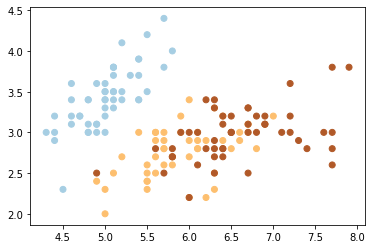

In [93]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired');

### Step 1. 開函數學習機

In [94]:
clf = SVC(gamma='auto')

### step 2.訓練

In [96]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### step 3. 預測

In [97]:
y_predict = clf.predict(x_test)

In [98]:
y_predict #預測

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [99]:
y_test  #答案

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [100]:
y_predict - y_test  #若為0則為正確

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

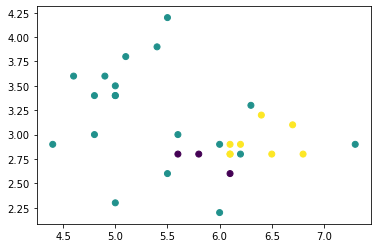

In [103]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_predict - y_test);

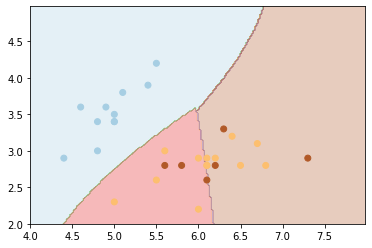

In [110]:
x0 = np.arange(4, 8, 0.02)
y0 = np.arange(2, 5, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P) #預測結果

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap='Paired', alpha=0.3);
plt.scatter(x_test[:,0], x_test[:,1], cmap='Paired', c=y_test);